## Random Numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generating random numbers is an extremely useful tool in scientific computing.  We will see some applications in a second, but first let's just get the syntax.  

We can do most of what we will need within the random sub-library of numpy. We can simply call the random number generator and ask for numbers as follow:

In [2]:
print(np.random.rand())
print(np.random.rand(5))

0.8195461711099037
[0.04241829 0.98674512 0.24914934 0.28605677 0.35112781]


From just a few numbers, you can probably guess what the distribution is, but to be safe, we will make a histogram:

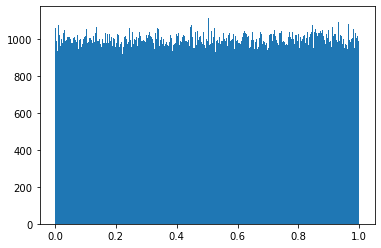

In [3]:
sample=np.random.rand(int(1e6))

plt.hist(sample,bins=1000)
plt.show()

So it seems safe to assume that random.rand() is generating a random number uniformly between 0 and 1.

This function actually will give you a bunch of random numbers in any shape 

In [4]:
print(np.random.rand(2,2,2))

[[[0.93259297 0.35960928]
  [0.16089045 0.83819215]]

 [[0.33784985 0.61601371]
  [0.29987359 0.32960427]]]


Given such a distribution, we can make our own function to cover any uniform distibution:

In [5]:
def my_uniform(low,high,number):
    out=np.random.rand(number)
    out*=(high-low)
    out+=low
    return out

In [6]:
my_uniform(10,11,20)

array([10.10570849, 10.08070334, 10.7003058 , 10.81053887, 10.57190272,
       10.17764461, 10.86262599, 10.86530758, 10.69668719, 10.66332398,
       10.91419898, 10.49226275, 10.60569535, 10.66757772, 10.01960925,
       10.63016981, 10.46745001, 10.46504886, 10.13315529, 10.49142328])

In [7]:
my_uniform(-102.3,99.2,20)

array([-65.5181357 ,  22.45957321, -84.39154698,   9.40694838,
        24.8719564 ,  99.07204544,  77.91187432, -27.3649765 ,
       -72.86929377, -64.87202328, -80.9784013 ,  48.92809975,
        75.67310326, -48.99163032,  83.77496095, -33.19924291,
       -47.88070457,  73.13821164,  29.4631383 ,   0.30577687])

naturally, numpy has its own version of this function

In [8]:
np.random.uniform(-102.3,99.2,20)

array([  2.36145998, -36.96148554, -84.67084991, -42.54549034,
       -48.43676646, -25.8260064 ,  68.32649946, -34.58715073,
        28.56169968,  -7.7761043 , -91.28987975, -29.84895058,
       -40.16796799, -57.30305183, -47.74247457,  -9.23807017,
         7.06952094,   9.85293901, -70.75346697,  82.54960512])

Random number generators are not actually random. Instead, they are just a map between a seed number that you put in and out output that is sufficiently complicated that it looks random to you. For example, we can pick the seed ourselves so that we always generate the same "random numbers" 

In [9]:
seed=101010
np.random.seed(seed)
print(np.random.rand(3))
np.random.seed(seed)
print(np.random.rand(3))

[0.37322865 0.98569233 0.73757893]
[0.37322865 0.98569233 0.73757893]


For a simple example, consider the following function:

In [10]:
def my_random(a,b,seed_in):
    return a*seed_in%b

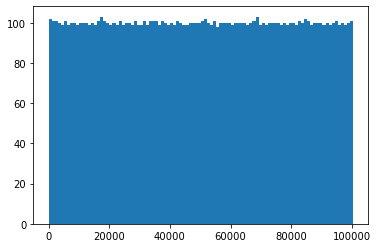

In [11]:
sample2=my_random(7**5,100319,np.arange(10000))

plt.hist(sample2,bins=100)
plt.show()

The idea is that the remainder after multiplying by a large number and dividing by a somewhat smaller but still large number is very difficult to predict if they are not multiples of each other. The result is that the remainder, for a predictable input is pretty close to a uniform random distribution of integers between 0 and $b-1$. Dividing by $b$ would convert this to a uniform distribution of numbers between 0 and 1

In [12]:
def my_random01(a,b,seed_in):
    return (a*seed_in%b)/b

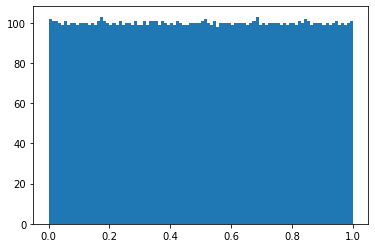

In [13]:
sample3=my_random01(7**5,100319,np.arange(10000))

plt.hist(sample3,bins=100)
plt.show()

Although it is not truly random, these numbers are effetively random as far as anyone seeing only the output is concerned. More importantly, once you have a source of the pseudo-random numbers, you can mold it to do other things you want

#### Normal Distribution

The other common kind of random number you will want is one drawn from a normal distibution.  This means the probability (density) of drawing the number x is $P(x) = e^{-(x-\mu)^2/2\sigma^2}/\sqrt{2\pi \sigma^2}$.  The number $\mu$ is called the mean and $\sigma$ is the variance. 

Python has a nice way of generating numbers with $\mu =0$ and $\sigma=1$:

In [14]:
np.random.randn(10)

array([ 1.87750931, -0.51383686,  2.12880455,  0.40153549,  0.47074907,
       -0.31624052,  1.07308879,  0.40959672, -0.07677096, -2.14859587])

Let's make a histogram to see what this is doing:

In [15]:
import matplotlib.pyplot as plt

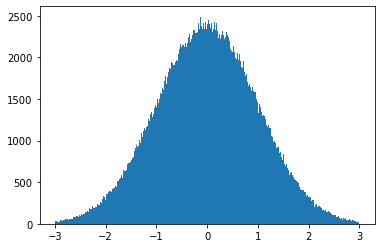

In [16]:
plt.hist(np.random.randn(1000000),bins=np.linspace(-3,3,1000))
plt.show()

It was one thing to go from a uniform distribution for $[0,1]$ and make it $[a,b]$, but making a normal distribution might seem like an entirely different challenge. To see that it is possible, consider teh following function:

25226


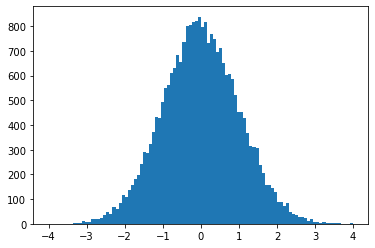

In [17]:
def my_normal(N):
    xtry=np.random.rand(N)*10-5 # pick N uniform numbers beyween -5 and 5
    yout=np.exp(-xtry**2/2) # calculate the distribution at that point
    ytry=np.random.rand(N) # pick a new uniform random number
    outlist=ytry<yout # keep the random number xtry only if ytry > yout
    return xtry[outlist]

sample5=my_normal(100000)
print(len(sample5))

plt.hist(sample5,bins=100)
plt.show()

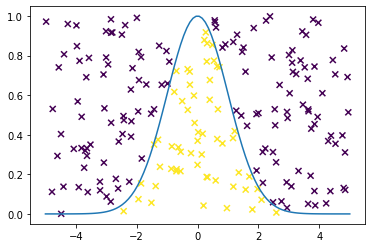

In [18]:
def my_normal_data(N):
    xtry=np.random.rand(N)*10-5 # pick N uniform numbers beyween -5 and 5
    yout=np.exp(-xtry**2/2) # calculate the distribution at that point
    ytry=np.random.rand(N) # pick a new uniform random number
    outlist=ytry<yout # keep the random number xtry only if ytry > yout
    return xtry,ytry,outlist

xtry1,ytry1,outlist=my_normal_data(200)
xN=np.linspace(-5,5,100)
yN=np.exp(-xN**2/2)

color1=outlist*100

plt.scatter(xtry1,ytry1,c=color1,marker='x')
plt.plot(xN,yN)
plt.show()

Here all points marked with an x in the scatter plot represents uniformly distributed randomly chosen pairs of (x,y). The color indicates whether of not the $y$ value is larger or smaller than our distribution. The points below the curve were accepted values of $x$ drawn from the distribution.

#### Discrete Random Numbers

At this point, you should get the idea that once we have on kind of random number, we can convert it into any other kind of random number. For example, you might want a list of random list of the 0s, 1s, and 2s

In [19]:
np.random.randint(3,size=100)

array([1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 1, 0])

Or we could take a binary number, like heads and tails. We can also add them up

In [20]:
np.random.randint(2,size=10).sum()

6

In [21]:
number_of_flips=10
number_of_trails=1000
results=np.zeros(number_of_trails)
for i in range(number_of_trails):
    results[i]=np.random.randint(2,size=number_of_flips).sum()/float(number_of_flips)

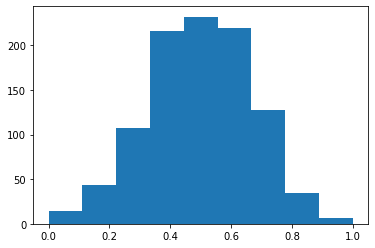

In [22]:
plt.hist(results,bins=np.linspace(0,1,10))
plt.show()

## Demonstration: calculating $\pi$

To get a quick sense of why this is useful, we can demonstrate how we can calculate $\pi$ using what we have just learned.  This will actually serve as an important example of a much broader and more powerful set of techniques later in the course, but for now it is just to give you a taste of how these things can work for you.

The idea is the following: image you pick a point randomly inside a square of length 2 on each side.  The area of this square is 4.  I circle placed within the square with radius 1 has area $\pi$.  If a random draw numbers that land inside the square with a uniform probability, then $\pi/4$ of them (on average) should also be inside the circle.  Said different, after picking a point in the square, we ask if it is also in the circle and keep track.  At the end we take number in circle / total we have caculated $\pi/4$

In [23]:
def pi_calculator(N):
    x=np.random.uniform(-1,1,N)  # make a list of N random numbers of x-axis of box
    y=np.random.uniform(-1,1,N) # make a list of N random numbers of y-axis of box
    z=(x**2+y**2<1) # make a list of every time x^2 + y^2 < 1 (inside the cicle)
    return z.sum()/float(N)*4 # add all the points in the circle up and return 4*cicle/N

In [24]:
pi_calculator(10**7)

3.141966

In [25]:
pi_calculator(10**8)

3.1416364

In [26]:
pi_calculator(10**9)

3.141689564

In [27]:
x=np.random.uniform(-1,1,5)
y=np.random.uniform(-1,1,5)
z=(x**2+y**2<1)

In [28]:
print(x,y)
print(x**2+y**2)
print(z)

[ 0.58625172  0.09416597 -0.35796905  0.21293216 -0.68706901] [ 0.43203679 -0.8689102   0.94496303  0.27448876  0.23200993]
[0.53034687 0.76387217 1.02109696 0.12068419 0.52589243]
[ True  True False  True  True]


In [29]:
z.sum()

4

To see how this is working, let's write a slower version to see the steps

In [30]:
def pi_slow(N):
    circle=0
    for i in range(N):
        x=np.random.uniform(-1,1,1)  # pick a x coordinate in the box
        y=np.random.uniform(-1,1,1) # pick a y coordinate in the box
        if x**2+y**2<1: # make a list of every time x^2 + y^2 < 1 (inside the cicle)
            circle+=1 
    return 4*circle/N # add all the points in the circle up and return 4*cicle/N

In [31]:
pi_slow(10**6)

3.13918

In [32]:
pi_calculator(10**8)

3.14172736

The slow implementation makes it clear what we are doing, but it clearly takes much longer.

In [33]:
import time

In [34]:
t1 = time.time()
pi_slow(1000000)
print(time.time() - t1)

9.322201013565063


In [35]:
t1 = time.time()
pi_calculator(1000000)
print(time.time() - t1)

0.05729389190673828


Anticipating something we will discuss later, now let's see how our error in the measurement of pi scales with the number of random points we pick

In [36]:
short=int(10**6)
medium=int(10**7)
Long=int(10**(8))
trials=100
pi_list_short=np.zeros(trials)
pi_list_medium=np.zeros(trials)
pi_list_Long=np.zeros(trials)
for i in range(trials):
    pi_list_short[i]=pi_calculator(short)
    pi_list_medium[i]=pi_calculator(medium)
    pi_list_Long[i]=pi_calculator(Long)

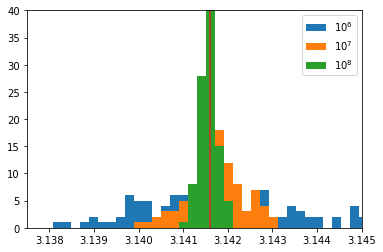

In [37]:
fig, ax = plt.subplots()
p1=ax.hist(pi_list_short,bins=np.linspace(3.13,3.15,100),label='$10^6$')
p2=ax.hist(pi_list_medium,bins=np.linspace(3.13,3.15,100),label='$10^7$')
p3=ax.hist(pi_list_Long,bins=np.linspace(3.13,3.15,100),label='$10^8$')
ax.plot([np.pi,np.pi],[0,40])
plt.ylim(0,40)
plt.xlim(3.1375,3.145)
leg = ax.legend()
plt.show()

By eye, it looks like the blue is a approximately 10 times wider than the green.  This would make sense if the error on the value of $\pi$ decreased by $1/\sqrt{N}$ where $N$ is the number of random points used in the calculation.  This is indeed what is going on and is a much more general fact about random numbers.

### Summary

Numpy has a number of basic math operations we will make a lot of use off.  Random numbers are a particularly valuable tool that is employed in all areas of science and engineering.  E.g. simulating the behavior of any measurement involves adding random numbers to you signal.  We can always use the output of the random number library to create the type of noise we want for a given application.  